# Using Quippy to compute descriptors of atomic environments

This tutorial shows how to use quippy to calculate various descriptors for a given atomic structure, contained in an Atoms object.

In [1]:
import quippy

At the moment, the pythonic wrapper around the descriptors fortran module still needs to be imported explicitly (hopefully this will be an invisible wrapper in the future, so that you can just do `from quippy import descriptors`).

In [2]:
from quippy import descriptors

Create a configuration:

In [29]:
at = quippy.diamond(3.5)
at.Z[:] = 6
at.positions

array([[ 0.   ,  0.   ,  0.   ],
       [ 0.875,  0.875,  0.875],
       [ 1.75 ,  1.75 ,  0.   ],
       [ 2.625,  2.625,  0.875],
       [ 1.75 ,  0.   ,  1.75 ],
       [ 2.625,  0.875,  2.625],
       [ 0.   ,  1.75 ,  1.75 ],
       [ 0.875,  2.625,  2.625]])

All descriptors are instantiated by a call to `Descriptor()`, which takes the descriptor initialisation string as its only argument. For a list of available descriptors and their parameters, see the following list, auto-generated using the following command: ```quip descriptor_str="--help"``` 

bispectrum_so4 
bispectrum_so3
behler
distance_2b
coordination
angle_3b
co_angle_3b
co_distance_2b
cosnx
trihis
water_monomer
water_dimer
A2_dimer
AB_dimer
bond_real_space
atom_real_space
power_so3
power_so4
soap
AN_monomer
general_monomer
general_dimer
general_trimer
rdf
as_distance_2b
molecule_lo_d
alex
com_dimer
distance_Nb


## A simple descriptor: pairwise distances

Here we use a simple pair distance between carbon atoms, with a cutoff of 1.5 Angstrom. There are several descriptors that can do this, one is ``distance_2b``, which takes a cutoff argument, and two Z values to specify the atom types. Alternatively, the ``distance_Nb`` descriptor could also do this, with ``order=2``, and it takes a string of Zs to specify the atom types. This is more general, ``order=3`` is a triangle-like three-body descriptor of the three sides of a triangle of 3 atoms. 

In [34]:
desc = descriptors.Descriptor("distance_2b Z1=6 Z2=6 cutoff=4")

The descriptor dimension is the length of the descriptor vector. For the scalar distance this is 1.

In [35]:
desc.n_dim # number of dimensions

1

This descriptor is very simple: it is scalar (dimension 1), and hence only has a single permutation.

In [36]:
desc.n_perm # number of permutations

1

In [37]:
desc.permutations() # array of permutation arrays

array([[1]], dtype=int32)

Many descriptors rely on the neighbour connectivity, so we need to call `calc_connect`, after setting the Atoms cutoff with a skin of 1 A:

In [38]:
at.set_cutoff(desc.cutoff()+1.0)
at.calc_connect()

We can now calculate how many instances of this descriptor are found in an `Atoms` (or `ASEAtoms`) object:

In [39]:
desc.count(at)

368

This also works transparently for iterables (such as lists), returning a list of the counts.

We can also calculate the actual descriptor values -- in this case, the list of pairwise distances:

In [40]:
d = desc.calc(at)
d

{'cutoff': array([ 0.30420743,  0.30420743,  1.        ,  1.        ,  1.        ,
         0.30420743,  0.30420743,  0.30420743,  1.        ,  1.        ,
         1.        ,  0.30420743,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  0.30420743,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  0.30420743,  1.        ,
         0.30420743,  0.30420743,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  0.30420743,  1.        ,  0.30420743,
         1.        ,  0.30420743,  0.30420743,  1.        ,  0.30420743,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  0.30420743,  1.        ,  0.30420743,
         1.        ,  0.30420743,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.    

Notice that the first array is called ``cutoff``, and it supplies the value of a cutoff function, implicit in all descriptors, which takes the descriptor value to zero as the atoms approach the cutoff, i.e. in this case as the distance between the two atoms approaches the cutoff. It is more complicated for three-body and higher-body descriptors, but the end result is always a descriptor which changes smoothly with atomic positions. 

Here is a histogram of the resulting descriptor array, i.e. of the interatomic distances

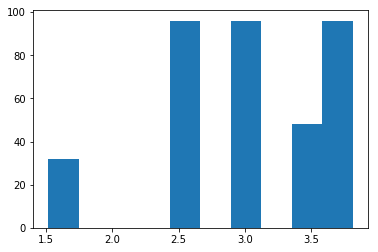

In [41]:
import matplotlib.pyplot as plt
plt.hist(d.descriptor)
plt.show()

Calculate size of descriptor data:

In [42]:
n_desc, n_cross = desc.descriptor_sizes(at)
print("n_desc=%d n_cross=%d" % (n_desc,n_cross))

n_desc=368 n_cross=736


`n_desc` is number of descriptors, `n_cross` is number of gradients

Gradients are returned in a `DescriptorCalcResult` object ( if the ``grad=True`` option is set ) which has the following elements:
- `descriptor` = the descriptor values (equivalent to `desc.calc(at)`)
- `grad` = the gradients
- `index` = the indices (`i_desc`, `i_atom`, `i_coord`)

In [43]:
res = desc.calc(at, grad=True)
list(res)

['descriptor', 'cutoff_grad', 'grad', 'index', 'cutoff']

In [44]:
res.descriptor[:,:10]

array([[ 3.81403658],
       [ 3.81403658],
       [ 2.90204669],
       [ 2.90204669],
       [ 3.5       ],
       [ 3.81403658],
       [ 3.81403658],
       [ 3.81403658],
       [ 2.90204669],
       [ 2.90204669],
       [ 3.5       ],
       [ 3.81403658],
       [ 2.90204669],
       [ 2.90204669],
       [ 3.5       ],
       [ 1.51554446],
       [ 2.47487373],
       [ 1.51554446],
       [ 2.47487373],
       [ 1.51554446],
       [ 2.47487373],
       [ 1.51554446],
       [ 2.90204669],
       [ 2.47487373],
       [ 2.90204669],
       [ 2.47487373],
       [ 3.5       ],
       [ 3.81403658],
       [ 2.90204669],
       [ 2.47487373],
       [ 2.90204669],
       [ 2.47487373],
       [ 3.5       ],
       [ 3.81403658],
       [ 2.47487373],
       [ 3.81403658],
       [ 3.81403658],
       [ 2.90204669],
       [ 2.47487373],
       [ 2.90204669],
       [ 2.47487373],
       [ 3.5       ],
       [ 3.81403658],
       [ 2.47487373],
       [ 3.81403658],
       [ 2

In [45]:
res.grad[:,:10]

array([[[-0.22941573],
        [ 0.6882472 ],
        [ 0.6882472 ]],

       [[ 0.22941573],
        [-0.6882472 ],
        [-0.6882472 ]],

       [[ 0.6882472 ],
        [-0.22941573],
        [ 0.6882472 ]],

       ..., 
       [[ 0.        ],
        [ 1.        ],
        [ 0.        ]],

       [[-0.        ],
        [-0.        ],
        [-1.        ]],

       [[ 0.        ],
        [ 0.        ],
        [ 1.        ]]])

In [46]:
res.index[:,:10]

array([[  1,   1],
       [  1,   2],
       [  2,   1],
       ..., 
       [367,   8],
       [368,   8],
       [368,   8]], dtype=int32)

## A many-body descriptor: SOAP

In [63]:
desc = descriptors.Descriptor("soap cutoff=3 l_max=4 n_max=4 atom_sigma=0.5 n_Z=1 Z={6} ")

There are now only 8 descriptors, because SOAP produces one for each atom in the structure

In [64]:
desc.descriptor_sizes(at)

(8, 232)

But each descriptor now is a long vector, because it encodes the entire environment of the atom up to the cutoff. The length of the vector depends on ```l_max``` and ```n_max``` and also on the number of atom types. 

In [66]:
desc.n_dim

51

In [65]:
desc.calc(at)

{'cutoff': array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]),
 'descriptor': array([[  2.63487898e-01,   3.19198559e-36,   1.25791460e-36,
           2.27467236e-03,   7.81144539e-04,   5.51080842e-01,
          -5.75136060e-35,   9.08637000e-36,   2.19176356e-02,
           7.81338076e-03,   5.76288508e-01,   1.23328865e-33,
           7.11087397e-35,   1.05593834e-01,   3.90765830e-02,
           2.84225658e-01,  -1.07002058e-35,  -7.67926380e-36,
          -2.01220340e-03,   2.59681991e-03,   4.20342133e-01,
          -4.28008230e-34,  -2.33271549e-35,  -1.37098193e-02,
           1.83668391e-02,   1.53297789e-01,   2.42118018e-34,
           3.81864106e-35,   8.90010050e-04,   4.31640581e-03,
          -2.51452500e-03,  -1.04494197e-37,  -2.53730616e-38,
           1.63990654e-05,  -2.38148142e-05,  -3.71873816e-03,
          -5.01572145e-37,   3.55380950e-38,   1.11732355e-04,
          -1.68437888e-04,  -1.91797776e-03,   1.33752572e-36,
          -2.52940178e-38,  -1.02578685e-05,

Note that the ```cutoff``` array is now all 1, because SOAP takes the cutoff into account when it computes the descriptor vector

We now add a hydrogen atom to the structure

In [71]:
at.add_atoms((0.2,0.2,0.2),(1))

In [74]:
at.calc_connect()
desc.descriptor_sizes(at)

(8, 258)

The descriptor sizes did not change! This is because the descriptor was set up above to only look at carbon atoms (Z=6). We need a new descriptor that takes account of H atoms. 

In [78]:
desc = descriptors.Descriptor("soap cutoff=3 l_max=4 n_max=4 atom_sigma=0.5 n_Z=2 Z={1 6} n_species=2 species_Z={1 6}")

The specification of which atoms are used as SOAP centers is separate to the specification of which atoms are taken into account in the environment. The ``n_Z=2 Z={1 6}`` options specify that both H and C are to be taken as SOAP centers. The ```n_species=2 species_Z={1 6}``` options specify the atom types to be taken into account in the environment.

Now the dimensionalithy of

In [79]:
desc.n_dim

181

In [80]:
desc.descriptor_sizes(at)

(9, 285)

In [81]:
desc.calc(at)

{'cutoff': array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]),
 'descriptor': array([[  8.77557915e-02,   6.67877090e-06,   1.32368918e-06, ...,
           5.39505036e-08,   3.31313515e-07,   0.00000000e+00],
        [  1.77188829e-03,   3.74461483e-04,   2.74157244e-04, ...,
           5.81842224e-08,   3.57313054e-07,   0.00000000e+00],
        [  1.24011279e-04,   4.57421978e-05,   4.91840662e-05, ...,
           5.81830007e-08,   3.57305552e-07,   0.00000000e+00],
        ..., 
        [  1.24011279e-04,   4.57421978e-05,   4.91840662e-05, ...,
           5.81830007e-08,   3.57305552e-07,   0.00000000e+00],
        [  3.76907877e-04,   4.04885591e-04,   3.44444944e-04, ...,
           5.79365059e-08,   3.55791811e-07,   0.00000000e+00],
        [  1.35807048e-01,   0.00000000e+00,   0.00000000e+00, ...,
           3.44738745e-07,   1.39187207e-07,   0.00000000e+00]])}

## General_monomer example: benzene

Now for a more interesting descriptor: a three-site benzene monomer

In [47]:
desc_monomer = descriptors.Descriptor('general_monomer signature={6 6 6} atom_ordercheck=F')

Three intramolecular distances = dimensionality 3:

In [48]:
desc_monomer.n_dim

3

And a lot more permutations now:

In [49]:
desc_monomer.n_perm

6

In [50]:
desc_monomer.permutations()

array([[1, 2, 3],
       [2, 1, 3],
       [1, 3, 2],
       [3, 1, 2],
       [2, 3, 1],
       [3, 2, 1]], dtype=int32)

Load some test configurations

In [51]:
benzat = quippy.AtomsList('benzene_frames.xyz')

In [52]:
benzat.pos.shape

(40, 3, 648)

In [53]:
for i in range(len(benzat)):
    benzat[i].set_cutoff(desc_monomer.cutoff()+0.5)
    benzat[i].calc_connect()

Calling `calc` or any of the other methods on an `AtomsList` returns a list of results. Here we look at the results for the first configuration:

In [54]:
res = desc_monomer.calc(benzat, grad=True)[0]

In [55]:
res.grad.shape

(648, 3, 3)